In [3]:
import os
print(os.getcwd())


C:\Users\selam\Solar-Data-Discovery\notebooks


In [4]:
print(benin.shape)
print(sierra_leone.shape)
print(togo.shape)

print(df_all.shape)


(517232, 20)
(504953, 20)
(516349, 20)
(1538534, 20)


In [5]:
df_all.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN,Benin


In [6]:
import pandas as pd

# Load cleaned CSVs
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all data
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

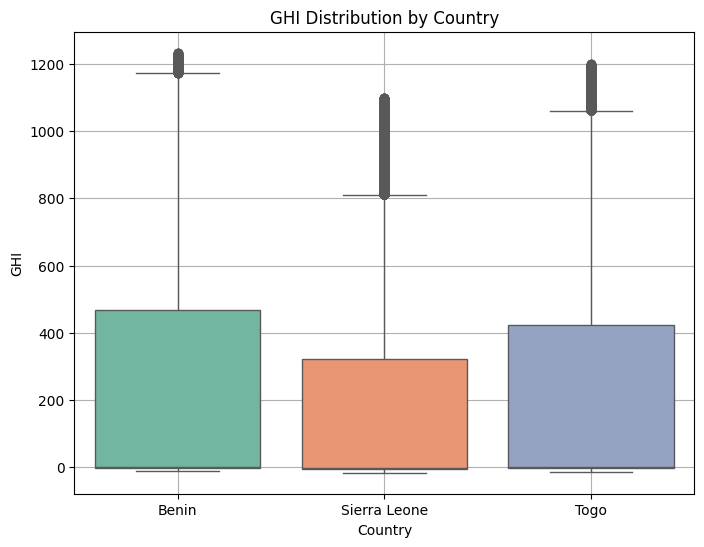

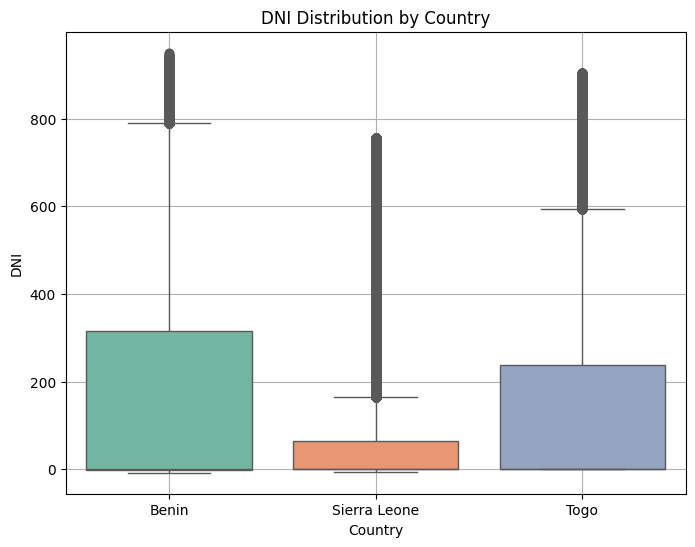

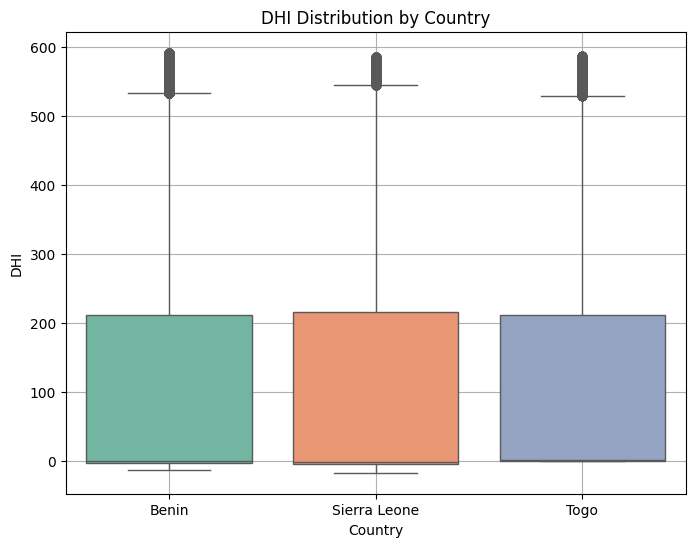

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_all, x='Country', y=metric, palette='Set2')
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.grid(True)
    plt.show()


In [11]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         235.93    0.6  328.13  166.66   -0.1  261.91  111.54    0.4   
Sierra Leone  180.42   -0.5  273.84  100.70   -0.1  196.34  106.60   -0.7   
Togo          223.86    0.5  317.31  147.98    0.0  247.68  112.78    1.5   

                      
                 std  
Country               
Benin         153.03  
Sierra Leone  152.67  
Togo          151.57

In [14]:
from scipy.stats import f_oneway, kruskal

# Extract GHI values
ghi_benin = benin['GHI']
ghi_sl = sierra_leone['GHI']
ghi_togo = togo['GHI']

# One-way ANOVA
f_stat, p_val = f_oneway(ghi_benin, ghi_sl, ghi_togo)
print(f"ANOVA result: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

# Optional non-parametric test
h_stat, p_kw = kruskal(ghi_benin, ghi_sl, ghi_togo)
print(f"Kruskal-Wallis result: H-statistic = {h_stat:.2f}, p-value = {p_kw:.4f}")


ANOVA result: F-statistic = 4587.79, p-value = 0.0000
Kruskal-Wallis result: H-statistic = 7543.87, p-value = 0.0000


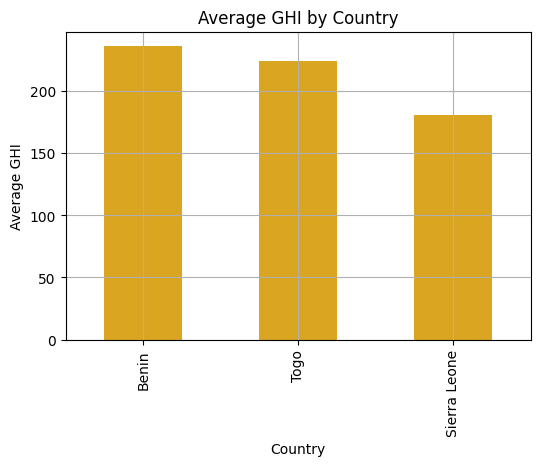

In [15]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False).round(2)

avg_ghi.plot(kind='bar', color='goldenrod', title='Average GHI by Country', ylabel='Average GHI', figsize=(6, 4))
plt.grid(True)
plt.show()


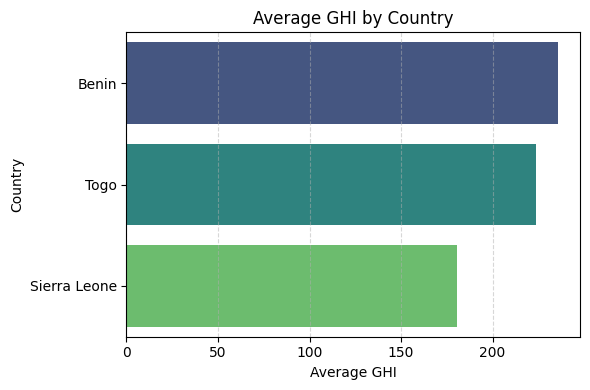

In [20]:

avg_phi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(
    x=avg_phi.values, 
    y=avg_phi.index, 
    hue=avg_phi.index,  # Assign y-variable to hue
    palette='viridis', 
    legend=False         # Disable redundant legend
)
plt.xlabel('Average GHI')
plt.title('Average GHI by Country')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()